# Taxi Company Analysis Project

## Overview
This project analyzes the profitability and performance of two taxi companies (Yellow Cab and Pink Cab) operating across 20 cities in the United States. The analysis includes transaction data, customer demographics, and city-level statistics to derive actionable business insights.

## Dataset
- **Cab_Data.csv**: Transaction details including company, city, distance, pricing
- **Customer_ID.csv**: Customer demographics (age, gender, income)
- **Transaction_ID.csv**: Payment information for each transaction
- **City.csv**: City-level population and user statistics

## Analysis Objectives
1. Compare profitability between Yellow Cab and Pink Cab
2. Identify most profitable cities and markets
3. Analyze customer segments and their spending patterns
4. Understand payment preferences and their impact on revenue

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets from data folder
cab_data = pd.read_csv("data/Cab_Data.csv")
city_data = pd.read_csv("data/City.csv")
customer_data = pd.read_csv("data/Customer_ID.csv")
transaction_data = pd.read_csv("data/Transaction_ID.csv")

cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


## 1. Data Loading and Initial Exploration

In [104]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [105]:
cab_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Date of Travel,359392.0,4.296407e+04,307.467197,42371.0,4.269700e+04,42988.00,4.323200e+04,43465.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


In [106]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [107]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [108]:
city_data.describe().T

,count,unique,top,freq
City,20,20,NEW YORK NY,1
Population,20,20,"8,405,837",1
Users,20,20,"302,149",1


In [109]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [110]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [111]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,49171.0,28398.252283,17714.137333,1.0,12654.5,27631.0,43284.5,60000.0
Age,49171.0,35.363121,12.599066,18.0,25.0,33.0,42.0,65.0
Income (USD/Month),49171.0,15015.631856,8002.208253,2000.0,8289.5,14656.0,21035.0,35000.0


In [112]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [113]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [114]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [115]:
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [116]:
transaction_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [117]:
customer_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

## 2. Data Quality Checks

In [118]:
cab_data.duplicated().sum()

np.int64(0)

In [119]:
city_data.duplicated().sum()

np.int64(0)

In [120]:
transaction_data.duplicated().sum()

np.int64(0)

In [121]:
customer_data.duplicated().sum()

np.int64(0)

In [122]:
# Convert date from Excel serial format to datetime
cab_data["Date of Travel"] = pd.to_datetime(cab_data["Date of Travel"], origin='1899-12-30', unit='D')

## 3. Data Preparation and Merging

In [123]:
cab_transaction=cab_data.merge(transaction_data, on="Transaction ID")

In [124]:
cab_transaction_customer=cab_transaction.merge(customer_data, on="Customer ID")
cab_transaction_customer.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [125]:
master_data=cab_transaction_customer.merge(city_data, on="City")
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


In [126]:
print(master_data.info())
print("How many values are empty?: ", master_data.isnull().sum().sum())
print("Number of duplicate records:", master_data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [127]:
master_data.describe().T

,count,mean,min,25%,50%,75%,max,std
Transaction ID,359392.0,10220761.185363,10000011.0,10110809.75,10221035.5,10330937.25,10440107.0,126805.803715
Date of Travel,359392,2017-08-17 01:37:55.042293760,2016-01-02 00:00:00,2016-11-23 00:00:00,2017-09-10 00:00:00,2018-05-12 00:00:00,2018-12-31 00:00:00,NaN
KM Travelled,359392.0,22.567254,1.9,12.0,22.44,32.96,48.0,12.233526
Price Charged,359392.0,423.443311,15.6,206.4375,386.36,583.66,2048.03,274.378911
Cost of Trip,359392.0,286.190113,19.0,151.2,282.48,413.6832,691.2,157.993661
Customer ID,359392.0,19191.652115,1.0,2705.0,7459.0,36078.0,60000.0,21012.412463
Age,359392.0,35.336705,18.0,25.0,33.0,42.0,65.0,12.594234
Income (USD/Month),359392.0,15048.822937,2000.0,8424.0,14685.0,21035.0,35000.0,7969.409482


## 4. Profitability Analysis

### 4.1 Calculate Profit Metric

In [128]:
# Calculate profit
master_data["Profit"] = master_data["Price Charged"] - master_data["Cost of Trip"]

# Company profit aggregation
company_profit = master_data.groupby("Company")["Profit"].sum()

### 4.2 Company-Level Analysis

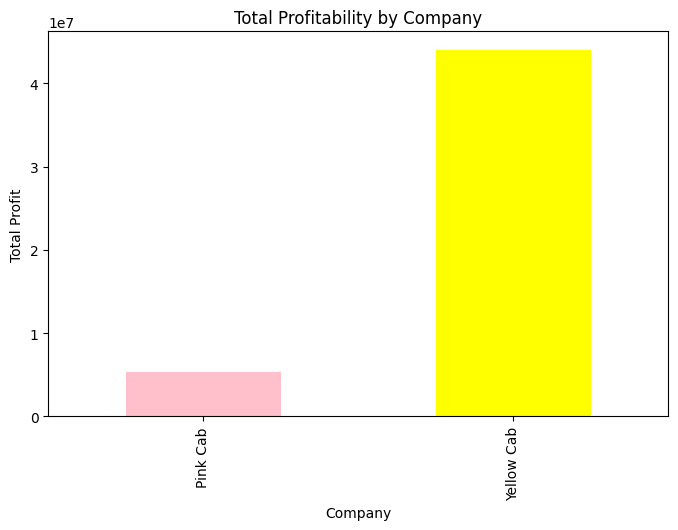

In [129]:
# Visualize company profitability
company_profit.plot(kind="bar", figsize=(8,5), color=["pink","yellow"])
plt.title("Total Profitability by Company")
plt.ylabel("Total Profit")
plt.xlabel("Company")
plt.savefig("images/total_profit_by_company.png", dpi=300, bbox_inches="tight")
plt.show()

In [130]:
city_profit=master_data.groupby("City")["Profit"].sum()

### 4.3 City-Level Analysis

In [131]:
city_profit.head()

City
ATLANTA GA    8.424329e+05
AUSTIN TX     5.267010e+05
BOSTON MA     1.768719e+06
CHICAGO IL    3.387313e+06
DALLAS TX     1.128733e+06
Name: Profit, dtype: float64

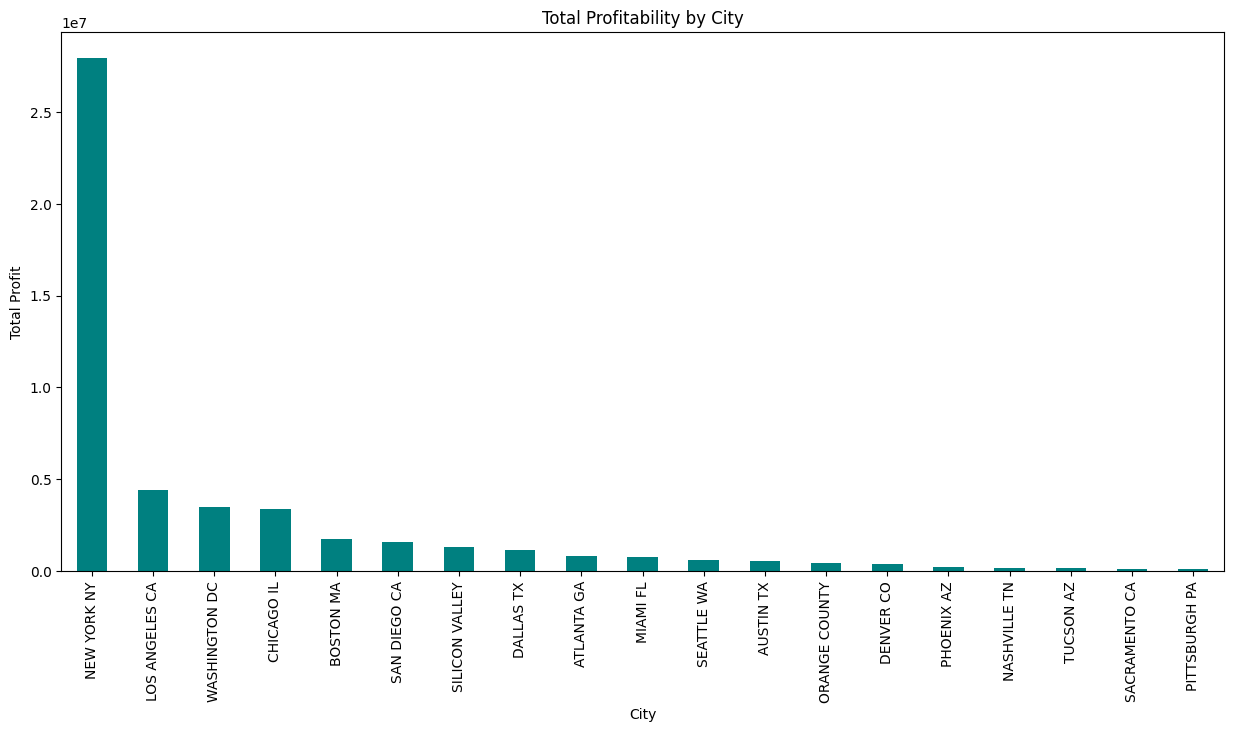

In [132]:
city_profit.sort_values(ascending=False).plot(kind="bar", figsize=(15,7), color="teal")
plt.title("Total Profitability by City")
plt.ylabel("Total Profit")
plt.xlabel("City")
plt.savefig("images/total_profit_by_city.png", dpi=300, bbox_inches="tight") 
plt.show()

In [133]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",16.844


In [134]:
master_data.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                         object
Profit                       float64
dtype: object

In [135]:
master_data["Users"] = master_data["Users"].str.replace(",", "").str.strip()
master_data["Population"] = master_data["Population"].str.replace(",", "").str.strip()

In [136]:
master_data["Users"]=pd.to_numeric(master_data["Users"])
master_data["Population"]=pd.to_numeric(master_data["Population"])

In [137]:
master_data[["Users", "Population"]].isnull().sum()

Users         0
Population    0
dtype: int64

In [138]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,16.844


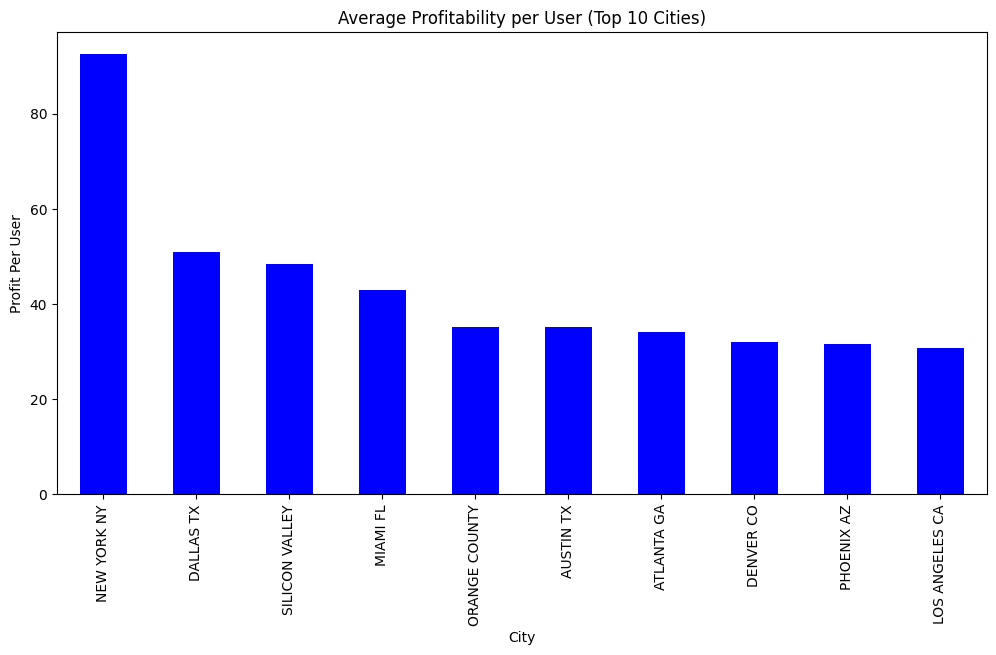

In [139]:
# Calculate city-level metrics for profit per user
city_metrics = master_data.groupby("City").agg({
    'Profit': 'sum',
    'Users': 'first',
    'Population': 'first'
})
city_metrics['Profit_per_User'] = city_metrics['Profit'] / city_metrics['Users']

# Top 10 cities by profit per user
city_metrics['Profit_per_User'].sort_values(ascending=False).head(10).plot(kind="bar", figsize=(12,6), color="blue")
plt.title("Average Profitability per User (Top 10 Cities)")
plt.ylabel("Profit Per User")
plt.xlabel("City")
plt.savefig("images/profit_per_user_top10.png", dpi=300, bbox_inches="tight")
plt.show()

### 4.4 Efficiency Metrics (Profit per User and Population)

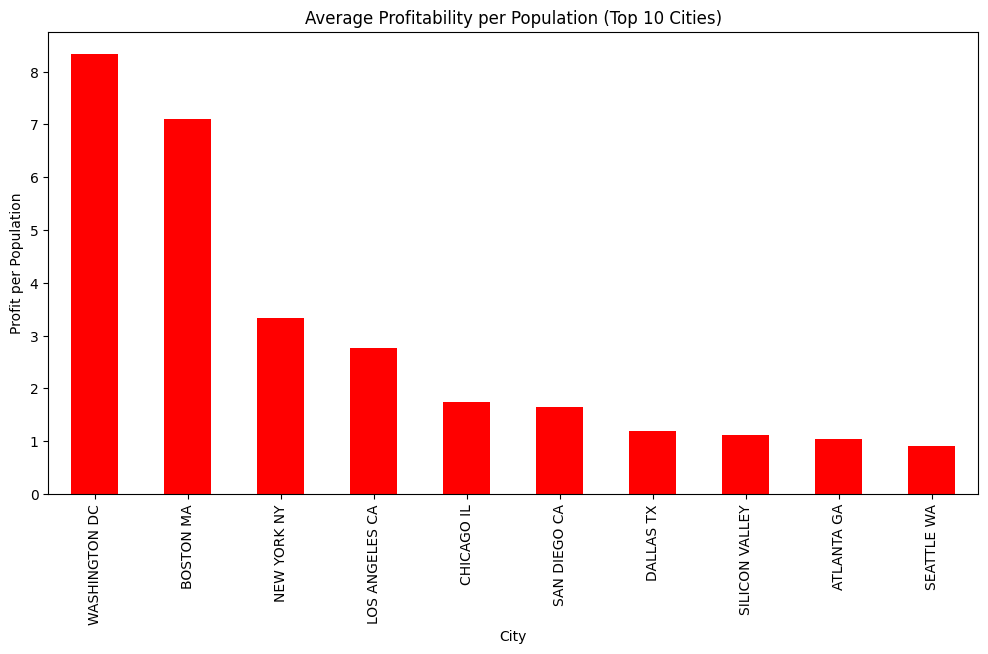

In [140]:
# Calculate profit per population
city_metrics['Profit_per_Capita'] = city_metrics['Profit'] / city_metrics['Population']

# Top 10 cities by profit per population
city_metrics['Profit_per_Capita'].sort_values(ascending=False).head(10).plot(kind="bar", figsize=(12,6), color="red")
plt.title("Average Profitability per Population (Top 10 Cities)")
plt.ylabel("Profit per Population")
plt.xlabel("City")
plt.savefig("images/profit_per_population_top10.png", dpi=300, bbox_inches="tight")
plt.show()

In [141]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701,16.844


In [142]:
# We calculate total and average profitability on a company basis
company_performance=master_data.groupby("Company")["Profit"].agg(["sum","mean"])
company_performance.rename(columns={"sum":"Total Profit", "mean":"Average Profit"}, inplace=True)

### 4.5 Detailed Company Performance Breakdown

In [143]:
company_performance

,Total Profit,Average Profit
Company,,
Pink Cab,5.307328e+06,62.652174
Yellow Cab,4.402037e+07,160.259986


In [144]:
# Total profitability by city and company
city_company_performance=master_data.groupby(["City","Company"])["Profit"].sum().unstack()
city_company_performance.head()

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,96050.076,7.463828e+05
AUSTIN TX,147445.290,3.792557e+05
BOSTON MA,262001.698,1.506718e+06
CHICAGO IL,318722.488,3.068591e+06
DALLAS TX,24730.112,1.104003e+06


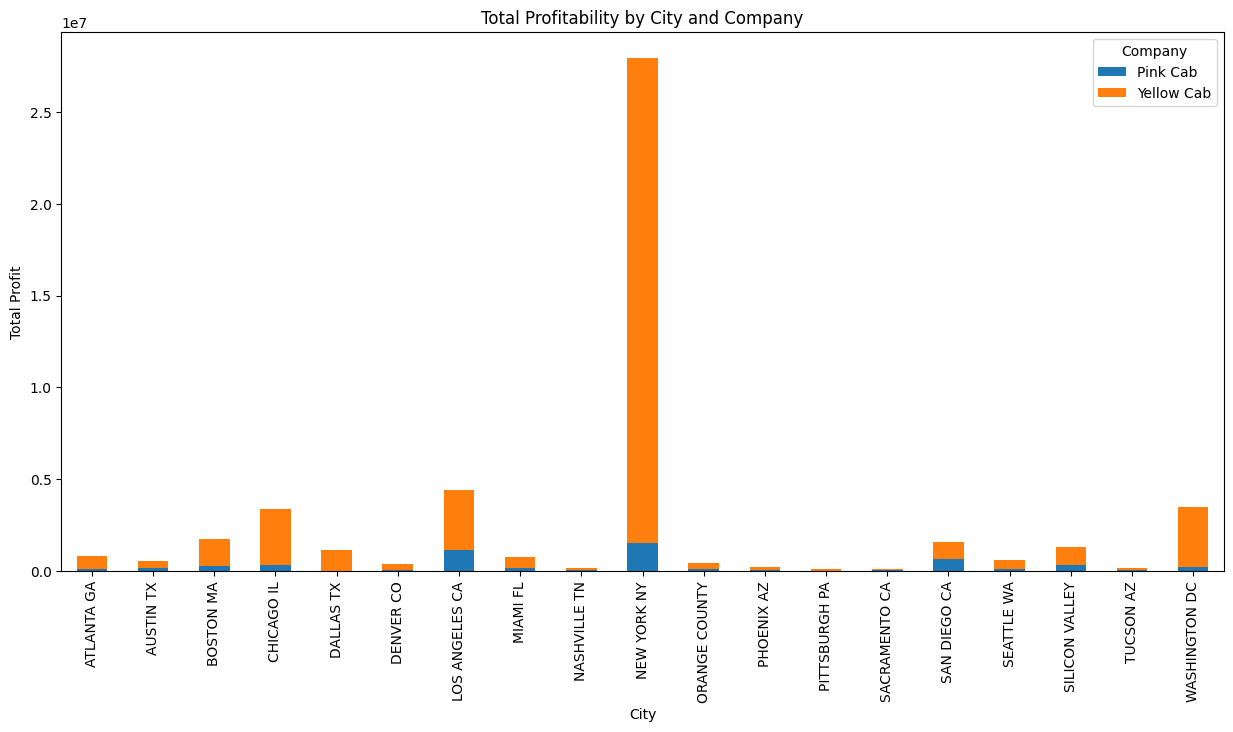

In [145]:
# Visualization (Company performance by city)
city_company_performance.plot(kind="bar", stacked=True, figsize=(15, 7))
plt.title("Total Profitability by City and Company")
plt.ylabel("Total Profit")
plt.xlabel("City")
plt.legend(title="Company")
plt.savefig("images/profit_by_city_and_company.png", dpi=300, bbox_inches="tight")
plt.show()

In [146]:
# Company performance summary
company_summary = master_data.groupby("Company").agg(
    Total_Profit=("Profit", "sum"),
    Average_Profit=("Profit", "mean")
)
company_summary

,Total_Profit,Average_Profit
Company,,
Pink Cab,5.307328e+06,62.652174
Yellow Cab,4.402037e+07,160.259986


## Demographic Analysis

        Total Profit  Avg Profit  Transaction Count  Avg Price
Gender                                                        
Female   20461950.34      133.32             153480     419.42
Male     28865751.15      140.18             205912     426.44


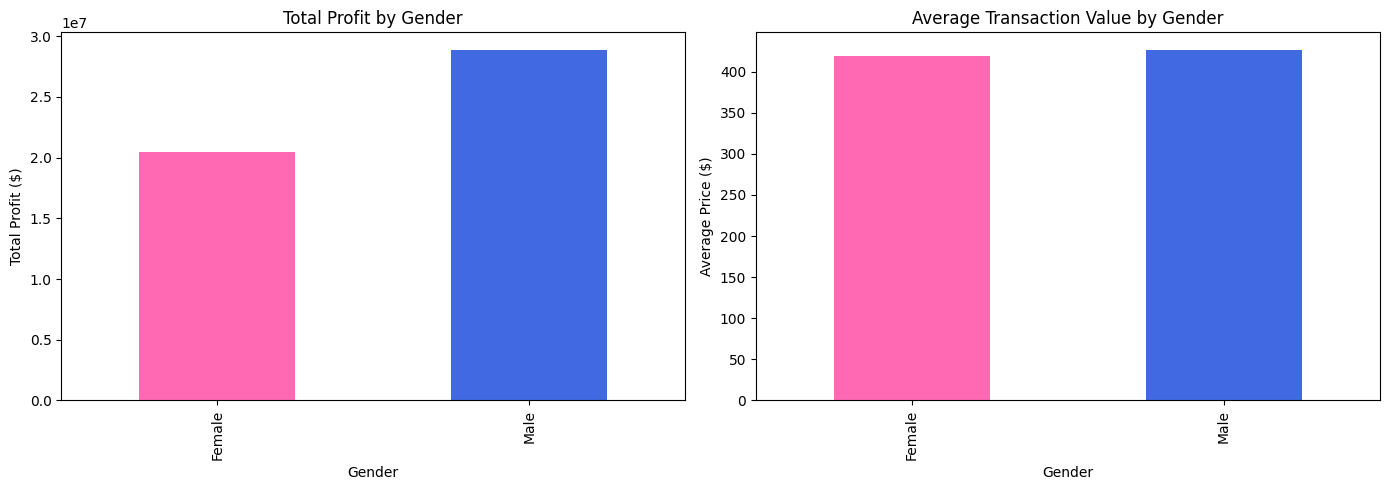

In [147]:
# Gender-based analysis
gender_analysis = master_data.groupby("Gender").agg({
    'Profit': ['sum', 'mean', 'count'],
    'Price Charged': 'mean'
}).round(2)
gender_analysis.columns = ['Total Profit', 'Avg Profit', 'Transaction Count', 'Avg Price']
print(gender_analysis)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Total profit by gender
master_data.groupby("Gender")["Profit"].sum().plot(kind="bar", ax=axes[0], color=['#FF69B4', '#4169E1'])
axes[0].set_title("Total Profit by Gender")
axes[0].set_ylabel("Total Profit ($)")
axes[0].set_xlabel("Gender")

# Plot 2: Average transaction value by gender
master_data.groupby("Gender")["Price Charged"].mean().plot(kind="bar", ax=axes[1], color=['#FF69B4', '#4169E1'])
axes[1].set_title("Average Transaction Value by Gender")
axes[1].set_ylabel("Average Price ($)")
axes[1].set_xlabel("Gender")

plt.tight_layout()
plt.savefig("images/gender_analysis.png", dpi=300, bbox_inches="tight")
plt.show()

              Total Profit  Avg Profit  Transaction Count  Avg Price
Payment_Mode                                                        
Card           29542680.69      137.09             215504     423.39
Cash           19785020.80      137.50             143888     423.52


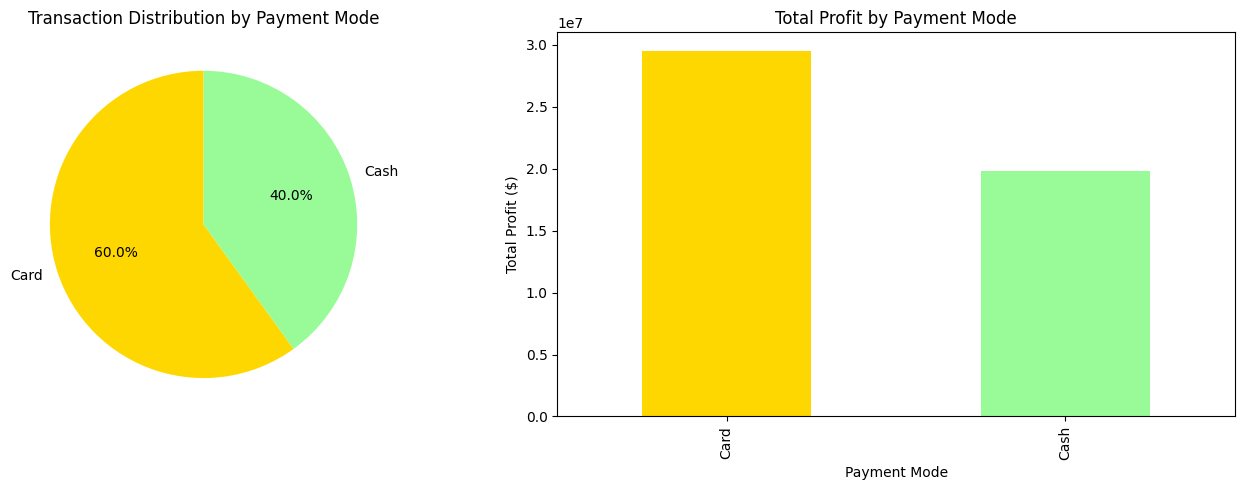

In [148]:
# Payment mode analysis
payment_analysis = master_data.groupby("Payment_Mode").agg({
    'Profit': ['sum', 'mean', 'count'],
    'Price Charged': 'mean'
}).round(2)
payment_analysis.columns = ['Total Profit', 'Avg Profit', 'Transaction Count', 'Avg Price']
print(payment_analysis)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Transaction distribution by payment mode
payment_counts = master_data['Payment_Mode'].value_counts()
axes[0].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', 
            colors=['#FFD700', '#98FB98'], startangle=90)
axes[0].set_title("Transaction Distribution by Payment Mode")

# Plot 2: Total profit by payment mode
master_data.groupby("Payment_Mode")["Profit"].sum().plot(kind="bar", ax=axes[1], color=['#FFD700', '#98FB98'])
axes[1].set_title("Total Profit by Payment Mode")
axes[1].set_ylabel("Total Profit ($)")
axes[1].set_xlabel("Payment Mode")

plt.tight_layout()
plt.savefig("images/payment_analysis.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\demir\AppData\Local\Temp\ipykernel_17432\347635806.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = master_data.groupby("Age_Group").agg({
C:\Users\demir\AppData\Local\Temp\ipykernel_17432\347635806.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  master_data.groupby("Age_Group")["Profit"].sum().plot(kind="bar", ax=axes[0], color='coral')
C:\Users\demir\AppData\Local\Temp\ipykernel_17432\347635806.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=

           Total Profit  Avg Profit  Transaction Count  Avg Price
Age_Group                                                        
18-25       12849446.93      137.66              93344     423.97
26-35       15530691.32      136.94             113414     422.95
36-45       10519732.73      138.42              75998     424.51
46-65       10427830.52      136.07              76636     422.46


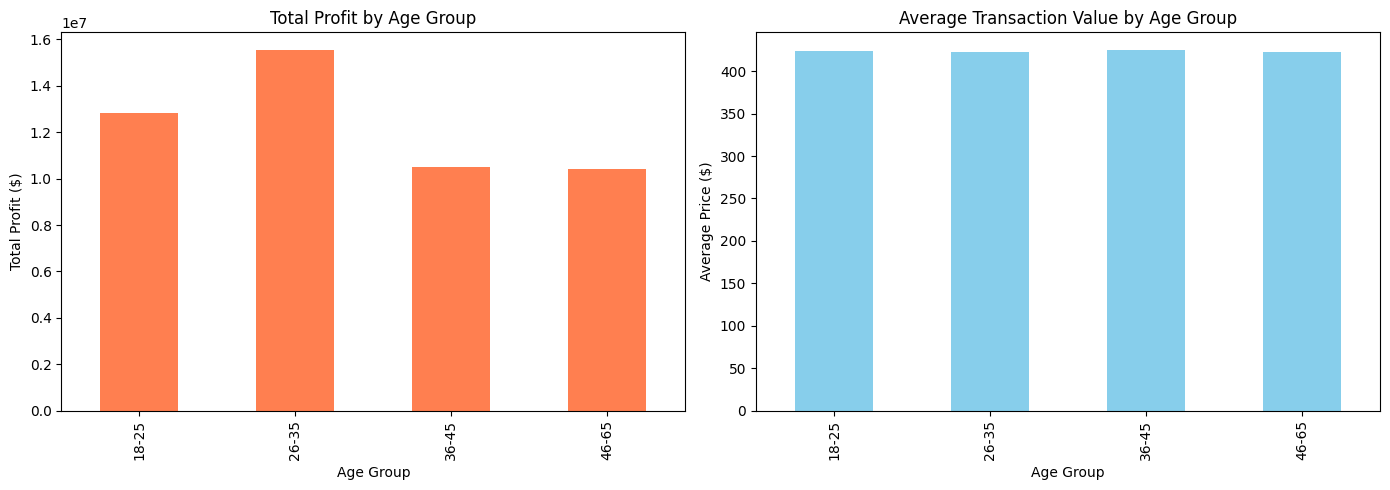

In [149]:
# Age group analysis
# Create age groups
master_data['Age_Group'] = pd.cut(master_data['Age'], 
                                   bins=[0, 25, 35, 45, 65], 
                                   labels=['18-25', '26-35', '36-45', '46-65'])

age_analysis = master_data.groupby("Age_Group").agg({
    'Profit': ['sum', 'mean', 'count'],
    'Price Charged': 'mean'
}).round(2)
age_analysis.columns = ['Total Profit', 'Avg Profit', 'Transaction Count', 'Avg Price']
print(age_analysis)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Total profit by age group
master_data.groupby("Age_Group")["Profit"].sum().plot(kind="bar", ax=axes[0], color='coral')
axes[0].set_title("Total Profit by Age Group")
axes[0].set_ylabel("Total Profit ($)")
axes[0].set_xlabel("Age Group")

# Plot 2: Average transaction value by age group
master_data.groupby("Age_Group")["Price Charged"].mean().plot(kind="bar", ax=axes[1], color='skyblue')
axes[1].set_title("Average Transaction Value by Age Group")
axes[1].set_ylabel("Average Price ($)")
axes[1].set_xlabel("Age Group")

plt.tight_layout()
plt.savefig("images/age_group_analysis.png", dpi=300, bbox_inches="tight")
plt.show()

## Market Share and Correlation Analysis

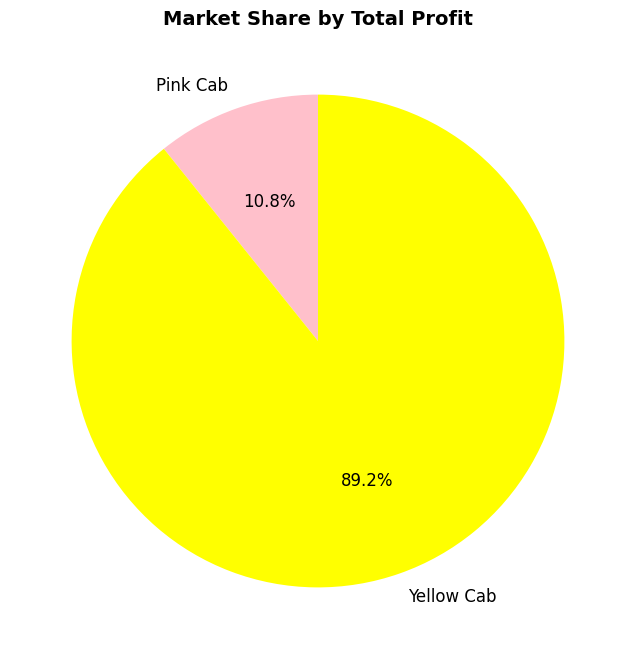

Company Profit Share:
Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64


In [150]:
# Market share by company (based on profit)
company_profit_share = master_data.groupby("Company")["Profit"].sum()

plt.figure(figsize=(8, 8))
plt.pie(company_profit_share.values, labels=company_profit_share.index, autopct='%1.1f%%',
        colors=['pink', 'yellow'], startangle=90, textprops={'fontsize': 12})
plt.title("Market Share by Total Profit", fontsize=14, fontweight='bold')
plt.savefig("images/market_share.png", dpi=300, bbox_inches="tight")
plt.show()

print("Company Profit Share:")
print(company_profit_share)

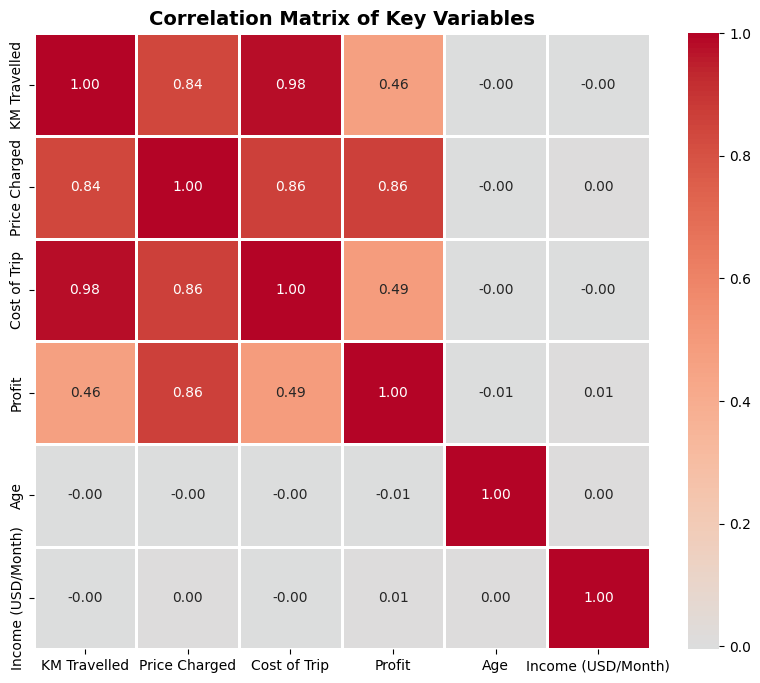

In [151]:
# Correlation analysis of numerical variables
correlation_vars = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Age', 'Income (USD/Month)']
correlation_matrix = master_data[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title("Correlation Matrix of Key Variables", fontsize=14, fontweight='bold')
plt.savefig("images/correlation_matrix.png", dpi=300, bbox_inches="tight")
plt.show()